In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
df = pd.read_csv(r"C:\Users\Malli Mounika\Downloads\spam.csv",encoding='latin-1')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns)
print("\nClass distribution:")
print(df['Category'].value_counts())

Shape of dataset: (5572, 2)

Column names: Index(['Category', 'Message'], dtype='object')

Class distribution:
Category
ham     4825
spam     747
Name: count, dtype: int64


In [12]:
#Convert Labels to Binary

df['Category'] = df['Category'].map({'ham':0, 'spam':1})

In [13]:
#Define Features and Target

X = df['Message']
y = df['Category']

In [14]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
#Create Machine Learning Models
#Logistic Regression Pipeline

log_model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('lr', LogisticRegression(max_iter=1000))
])

In [16]:
#Random Forest Pipeline

rf_model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [18]:
#Fold Cross Validation

scoring = ['accuracy','precision','recall','f1']

log_cv = cross_validate(log_model, X, y, cv=10, scoring=scoring)
rf_cv = cross_validate(rf_model, X, y, cv=10, scoring=scoring)

In [19]:
#Print Cross Validation Results
print("===== Logistic Regression (10-Fold CV) =====")
print("Accuracy:", log_cv['test_accuracy'].mean())
print("Precision:", log_cv['test_precision'].mean())
print("Recall:", log_cv['test_recall'].mean())
print("F1 Score:", log_cv['test_f1'].mean())
print("Std Dev:", log_cv['test_accuracy'].std())

print("\n===== Random Forest (10-Fold CV) =====")
print("Accuracy:", rf_cv['test_accuracy'].mean())
print("Precision:", rf_cv['test_precision'].mean())
print("Recall:", rf_cv['test_recall'].mean())
print("F1 Score:", rf_cv['test_f1'].mean())
print("Std Dev:", rf_cv['test_accuracy'].std())

===== Logistic Regression (10-Fold CV) =====
Accuracy: 0.9658996287072965
Precision: 0.9880840434307665
Recall: 0.754972972972973
F1 Score: 0.8549830433128667
Std Dev: 0.006172825100828139

===== Random Forest (10-Fold CV) =====
Accuracy: 0.9786419824585112
Precision: 0.9952552151984657
Recall: 0.8447927927927926
F1 Score: 0.9135113656355237
Std Dev: 0.004915810074880993


In [20]:
#Train Final Models

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('rf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [21]:
#Test Set Evaluation

log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("Logistic Regression Test Accuracy:",
      accuracy_score(y_test, log_pred))

print("Random Forest Test Accuracy:",
      accuracy_score(y_test, rf_pred))

Logistic Regression Test Accuracy: 0.967713004484305
Random Forest Test Accuracy: 0.97847533632287


In [22]:
#Detailed Classification Report

print("\n===== Logistic Regression Report =====")
print(classification_report(y_test, log_pred))

print("\n===== Random Forest Report =====")
print(classification_report(y_test, rf_pred))


===== Logistic Regression Report =====
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


===== Random Forest Report =====
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [23]:
#Confusion Matrix
print("Logistic Regression Confusion Matrix")
print(confusion_matrix(y_test, log_pred))

print("\nRandom Forest Confusion Matrix")
print(confusion_matrix(y_test, rf_pred))

Logistic Regression Confusion Matrix
[[966   0]
 [ 36 113]]

Random Forest Confusion Matrix
[[966   0]
 [ 24 125]]


In [24]:
#Performance Comparison Table

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "CV Accuracy": [log_cv['test_accuracy'].mean(), rf_cv['test_accuracy'].mean()],
    "CV F1 Score": [log_cv['test_f1'].mean(), rf_cv['test_f1'].mean()],
    "Std Dev (Stability)": [log_cv['test_accuracy'].std(), rf_cv['test_accuracy'].std()]
})

comparison

,Model,CV Accuracy,CV F1 Score,Std Dev (Stability)
0,Logistic Regression,0.965900,0.854983,0.006173
1,Random Forest,0.978642,0.913511,0.004916


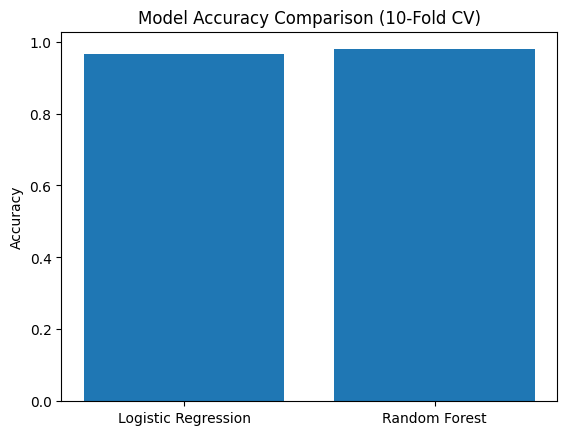

In [25]:
#Accuracy Comparison Graph

models = ['Logistic Regression', 'Random Forest']
accuracies = [
    log_cv['test_accuracy'].mean(),
    rf_cv['test_accuracy'].mean()
]

plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison (10-Fold CV)")
plt.ylabel("Accuracy")
plt.show()